In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
import numpy.linalg as lng
import math

points_class_0 = np.array(np.arange(120).reshape((2, 60)), dtype=float)
points_class_1 = np.array(np.arange(120).reshape((2, 60)), dtype=float)
choice = 0
std_dev = np.sqrt(0.1)

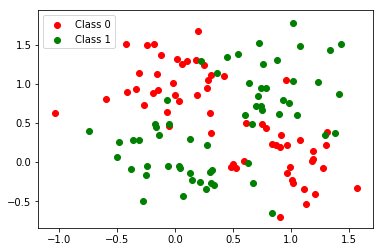

In [2]:
for i in range(0, 60):
    choice = random.randint(0, 2)
    if choice == 0:
        points_class_0[0, i] = random.normal(loc=0.0, scale = std_dev)
        points_class_0[1, i] = random.normal(loc=1.0, scale=std_dev)
    else:
        points_class_0[0, i] = random.normal(loc=1.0, scale = std_dev)
        points_class_0[1, i] = random.normal(loc=0.0, scale = std_dev)
    choice = random.randint(0, 2)
    if choice == 0:
        points_class_1[0, i] = random.normal(loc = 0.0, scale = std_dev)
        points_class_1[1, i] = random.normal(loc = 0.0, scale = std_dev)
    else:
        points_class_1[0, i] = random.normal(loc = 1.0, scale = std_dev)
        points_class_1[1, i] = random.normal(loc=1.0, scale=std_dev)

plt.scatter(points_class_0[0, :], points_class_0[1, :], c='red', label='Class 0')
plt.scatter(points_class_1[0, :], points_class_1[1, :], c='green', label='Class 1')
plt.legend()
plt.show()

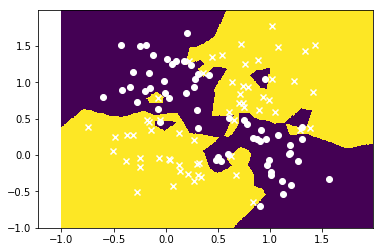

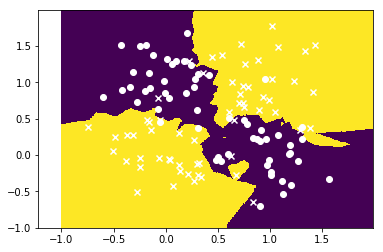

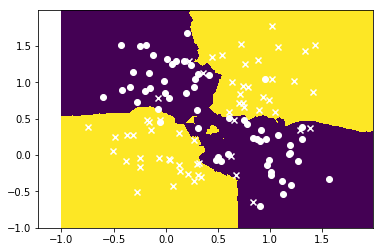

In [3]:
all_points = np.concatenate((points_class_0, points_class_1), axis = 1)
K = [1, 3, 5]

X = [-1.0 + i * 0.01 for i in range(0, 300)]
Y = [-1.0 + i * 0.01 for i in range(0, 300)]
xv, yv = np.meshgrid(X, Y, indexing='ij')

distances_array = []

for k_param in K:
    results_array = np.array(np.arange(90000).reshape((300, 300)), dtype=float)
    for i in range(0, 300):
        for j in range(0, 300):
            point_vector = np.array([xv[i, j], yv[i, j]], dtype=float).transpose()
            for training_index in range(0, 120):
                distances_array.append(lng.norm(point_vector - all_points[:, training_index]))
            indices = np.argsort(distances_array)[0:k_param]
            class_0_count = sum(1 for i in indices if i < 60)
            if class_0_count < k_param / 2.0:
                results_array[i, j] = 1
            else:
                results_array[i, j] = 0
            distances_array = []

    plt.pcolor(xv, yv, results_array)
    plt.scatter(all_points[0, 0:60], all_points[1, 0:60], marker='o', color='white')
    plt.scatter(all_points[0, 60:120], all_points[1, 60:120], marker='x', color='white')
    plt.show()

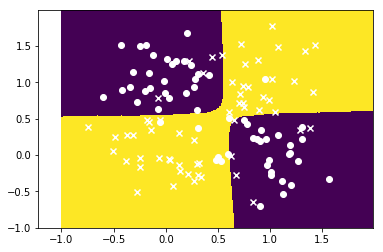

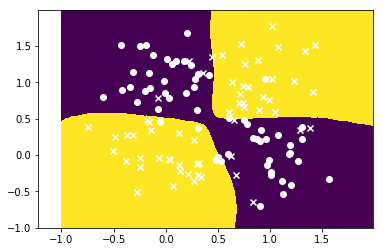

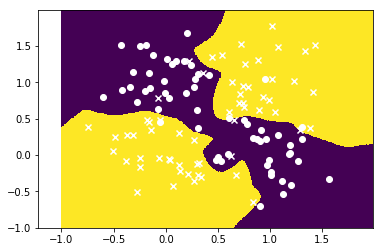

In [4]:
variances_list = [0.5, 0.1, 0.01]
for var in variances_list:
    results_array = np.array(np.arange(90000).reshape((300, 300)), dtype=float)
    for i in range(0, 300):
        for j in range(0, 300):
            point_vector = np.array([xv[i, j], yv[i, j]], dtype=float).transpose()
            class_0_point = 0.0
            class_1_point = 0.0
            for training_index in range(0, 120):
                contribution = math.exp(-0.5 * math.pow(lng.norm(point_vector - all_points[:, training_index]), 2) / var)
                if training_index < 60:
                    class_0_point += contribution
                else:
                    class_1_point += contribution
            if class_0_point > class_1_point:
                results_array[i, j] = 0
            else:
                results_array[i, j] = 1

    plt.pcolor(xv, yv, results_array)
    plt.scatter(all_points[0, 0:60], all_points[1, 0:60], marker='o', color='white')
    plt.scatter(all_points[0, 60:120], all_points[1, 60:120], marker='x', color='white')
    plt.show()

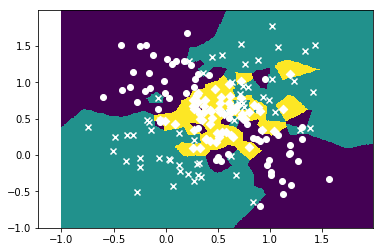

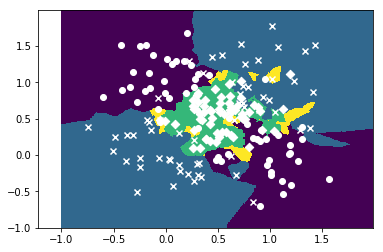

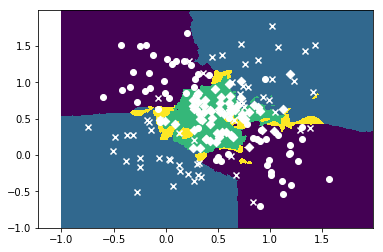

In [5]:
additional_points = np.array(np.arange(120).reshape((2, 60)), dtype=float)
std_dev = np.sqrt(0.05)

for i in range(0, 60):
    additional_points[0, i] = random.normal(loc = 0.5, scale = std_dev)
    additional_points[1, i] = random.normal(loc = 0.5, scale = std_dev)

all_points = np.concatenate((all_points, additional_points), axis = 1)
for k_param in K:
    results_array = np.array(np.arange(90000).reshape((300, 300)), dtype=float)
    for i in range(0, 300):
        for j in range(0, 300):
            point_vector = np.array([xv[i, j], yv[i, j]], dtype=float).transpose()
            for training_index in range(0, 180):
                distances_array.append(lng.norm(point_vector - all_points[:, training_index]))
            indices = np.argsort(distances_array)[0:k_param]
            class_0_count = sum(1 for i in indices if i < 60)
            class_1_count = sum(1 for i in indices if i >= 60 and i < 120)
            class_2_count = sum(1 for i in indices if i >=120)
            if class_0_count > class_1_count and class_0_count > class_2_count:
                results_array[i, j] = 0
            elif class_1_count > class_0_count and class_1_count > class_2_count:
                results_array[i, j] = 1
            elif class_2_count > class_0_count and class_2_count > class_1_count:
                results_array[i, j] = 2
            else:
                results_array[i, j] = 3
            distances_array = []

    plt.pcolor(xv, yv, results_array)
    plt.scatter(all_points[0, 0:60], all_points[1, 0:60], marker='o', color='white')
    plt.scatter(all_points[0, 60:120], all_points[1, 60:120], marker='x', color='white')
    plt.scatter(all_points[0, 120:180], all_points[1, 120:180], marker='D', color='white')
    plt.show()

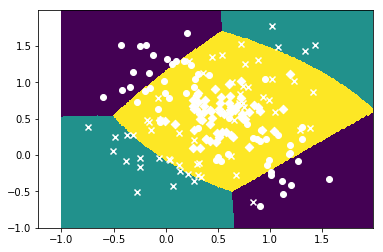

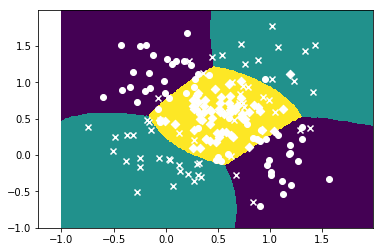

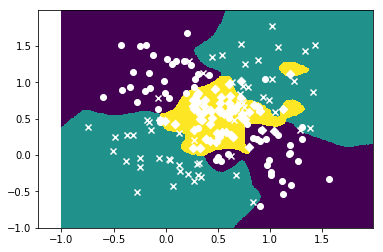

In [6]:
for var in variances_list:
    results_array = np.array(np.arange(90000).reshape((300, 300)), dtype=float)
    for i in range(0, 300):
        for j in range(0, 300):
            point_vector = np.array([xv[i, j], yv[i, j]], dtype=float).transpose()
            class_points_list = [0.0, 0.0, 0.0]
            for training_index in range(0, 180):
                contribution = math.exp(-0.5 * math.pow(lng.norm(point_vector - all_points[:, training_index]), 2) / var)
                if training_index < 60:
                    class_points_list[0] += contribution
                elif training_index < 120:
                    class_points_list[1] += contribution
                else:
                    class_points_list[2] += contribution
            results_array[i, j] = np.argsort(class_points_list)[-1]
    plt.pcolor(xv, yv, results_array)
    plt.scatter(all_points[0, 0:60], all_points[1, 0:60], marker='o', color='white')
    plt.scatter(all_points[0, 60:120], all_points[1, 60:120], marker='x', color='white')
    plt.scatter(all_points[0, 120:180], all_points[1, 120:180], marker='D', color='white')
    plt.show()